### Module 3

In [1]:
from pathlib import Path

parent_dir = Path().resolve().parent 
data_path = parent_dir/"data/module3"   
result_path = parent_dir/"results/module3" 
result_path.mkdir(exist_ok=True)

Ex3.1

In [ ]:
from a2cw import load_nii

scans, masks = load_nii(data_path)
print(f"Data loaded for {len(scans)} patients.")

Data loaded for 40 patients.



For patient 4:
  Segmentation range (without padding): x=(93, 104), y=(209, 220), z=(81, 89)
  Subvolume shape: (71, 71, 18)
  Metrices: Dice=0.1830, Precision=0.1034, Recall=0.7986

For patient 9:
  Segmentation range (without padding): x=(387, 396), y=(238, 248), z=(108, 112)
  Subvolume shape: (69, 70, 14)
  Metrices: Dice=0.0468, Precision=0.0241, Recall=0.7993

For patient 33:
  Segmentation range (without padding): x=(202, 248), y=(270, 323), z=(116, 138)
  Subvolume shape: (106, 113, 32)
  Metrices: Dice=0.2791, Precision=0.1687, Recall=0.8067

For patient 34:
  Segmentation range (without padding): x=(83, 93), y=(215, 224), z=(159, 163)
  Subvolume shape: (70, 69, 14)
  Metrices: Dice=0.0140, Precision=0.0071, Recall=0.7967

For patient 18:
  Segmentation range (without padding): x=(308, 316), y=(331, 341), z=(96, 97)
  Subvolume shape: (68, 70, 11)
  Metrices: Dice=0.0088, Precision=0.0044, Recall=0.7959

For patient 15:
  Segmentation range (without padding): x=(129, 191), y

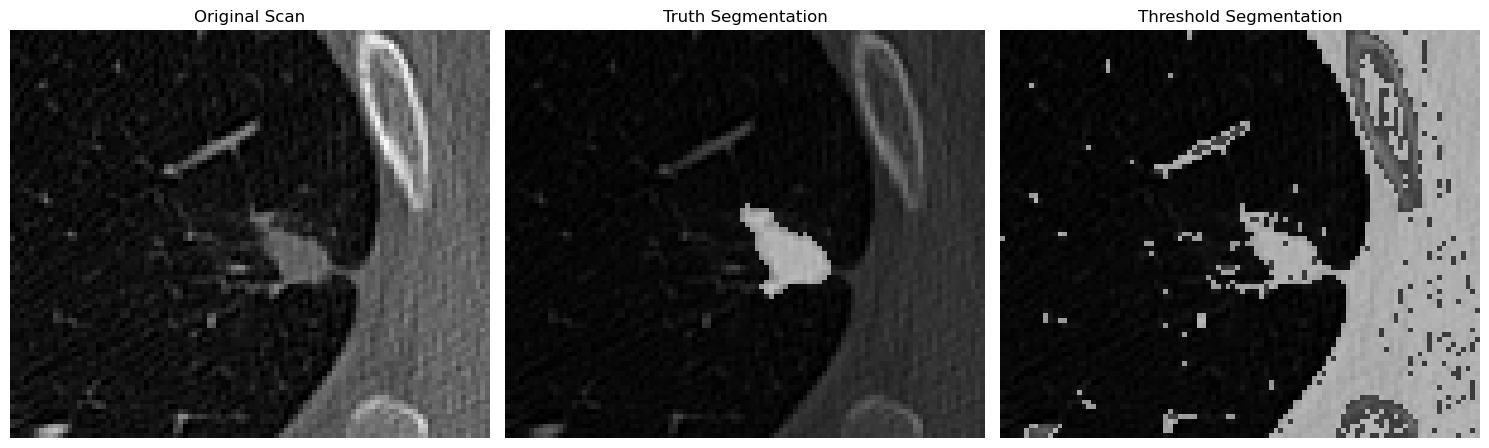


For patient 38:
  Segmentation range (without padding): x=(343, 380), y=(219, 255), z=(407, 432)
  Subvolume shape: (97, 96, 35)
  Metrices: Dice=0.2283, Precision=0.1331, Recall=0.8011


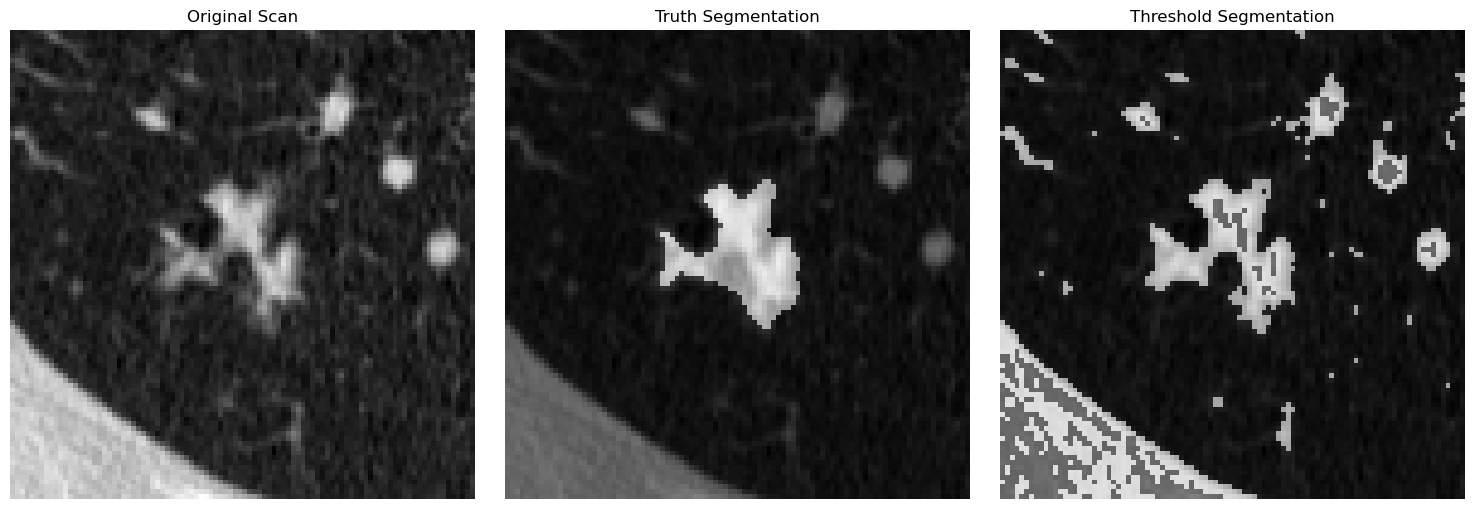


For patient 27:
  Segmentation range (without padding): x=(87, 94), y=(253, 262), z=(58, 60)
  Subvolume shape: (67, 69, 12)
  Metrices: Dice=0.0375, Precision=0.0192, Recall=0.7869

For patient 5:
  Segmentation range (without padding): x=(141, 157), y=(204, 220), z=(76, 79)
  Subvolume shape: (76, 76, 13)
  Metrices: Dice=0.0694, Precision=0.0363, Recall=0.8005

For patient 13:
  Segmentation range (without padding): x=(154, 182), y=(326, 357), z=(108, 116)
  Subvolume shape: (88, 91, 18)
  Metrices: Dice=0.1206, Precision=0.0652, Recall=0.8014

For patient 8:
  Segmentation range (without padding): x=(378, 388), y=(263, 273), z=(103, 105)
  Subvolume shape: (70, 70, 12)
  Metrices: Dice=0.1162, Precision=0.0627, Recall=0.7879

For patient 31:
  Segmentation range (without padding): x=(365, 396), y=(295, 321), z=(168, 178)
  Subvolume shape: (91, 86, 20)
  Metrices: Dice=0.2464, Precision=0.1456, Recall=0.8009

For patient 28:
  Segmentation range (without padding): x=(125, 129), y=

In [ ]:
import numpy as np
from a2cw import seg_range, subvolume, segment, evaluate, visualise, otsu_segment

results = {}

for id in scans.keys():
    print(f"\nFor patient {id}:")
    
    # find the segmentation range
    range = seg_range(masks[id])
    
    print(f"  Segmentation range (without padding): x={range['x']}, y={range['y']}, z={range['z']}")
    
    # create subvolume
    subv = subvolume(scans[id], range)
    subv_mask = subvolume(masks[id], range)
    
    print(f"  Subvolume shape: {subv.shape}")
    
    # threshold segmentation
    segmentation = segment(subv, subv_mask)   
    #segmentation = otsu_segment(subv)

    # evaluate result
    metrics = evaluate(segmentation, subv_mask)
    
    print(f"  Metrices: Dice={metrics['dice']:.4f}, Precision={metrics['precision']:.4f}, Recall={metrics['recall']:.4f}")
    
    results[id] = {
        'subvolume': subv,
        'truth': subv_mask,
        'segmentation': segmentation,
        'metrics': metrics
    }
    
    # visualise first patient
    #if len(results) == 1: 
    if id == '22' or id == '38':
        visualise(subv, subv_mask, segmentation)

# analysis all results
dice_scores = [results[pid]['metrics']['dice'] for pid in results]
mean_dice = np.mean(dice_scores)
std_dice = np.std(dice_scores)

print(f"\nMean value of Dice: {mean_dice:.4f} ± {std_dice:.4f}")


Ex3.2

In [ ]:
from a2cw import load_nii, load_labels

#scans, masks = load_nii(data_path)    # Don't reload if it has been loaded before (will cause MemoryError)
labels = load_labels(data_path)

print(f"Labels loaded for {len(labels)} patients, \nScan data loaded for {len(scans)} patients.")

Labels loaded for 40 patients, 
Scan data loaded for 40 patients.


Intensity range for all patients: [-1024.0, 1733.0]
Using 100 bins to calculate the uniformity.

Extracted 40 patient features, print the first five rows:
          energy         mad  uniformity  label
34  7.550384e+07  441.404752    0.019863      2
12  2.368756e+06  118.830221    0.030164      1
39  1.529488e+09  243.220318    0.018037      2
15  2.266135e+08  161.470332    0.028479      2
23  5.397690e+06  180.286242    0.023238      1


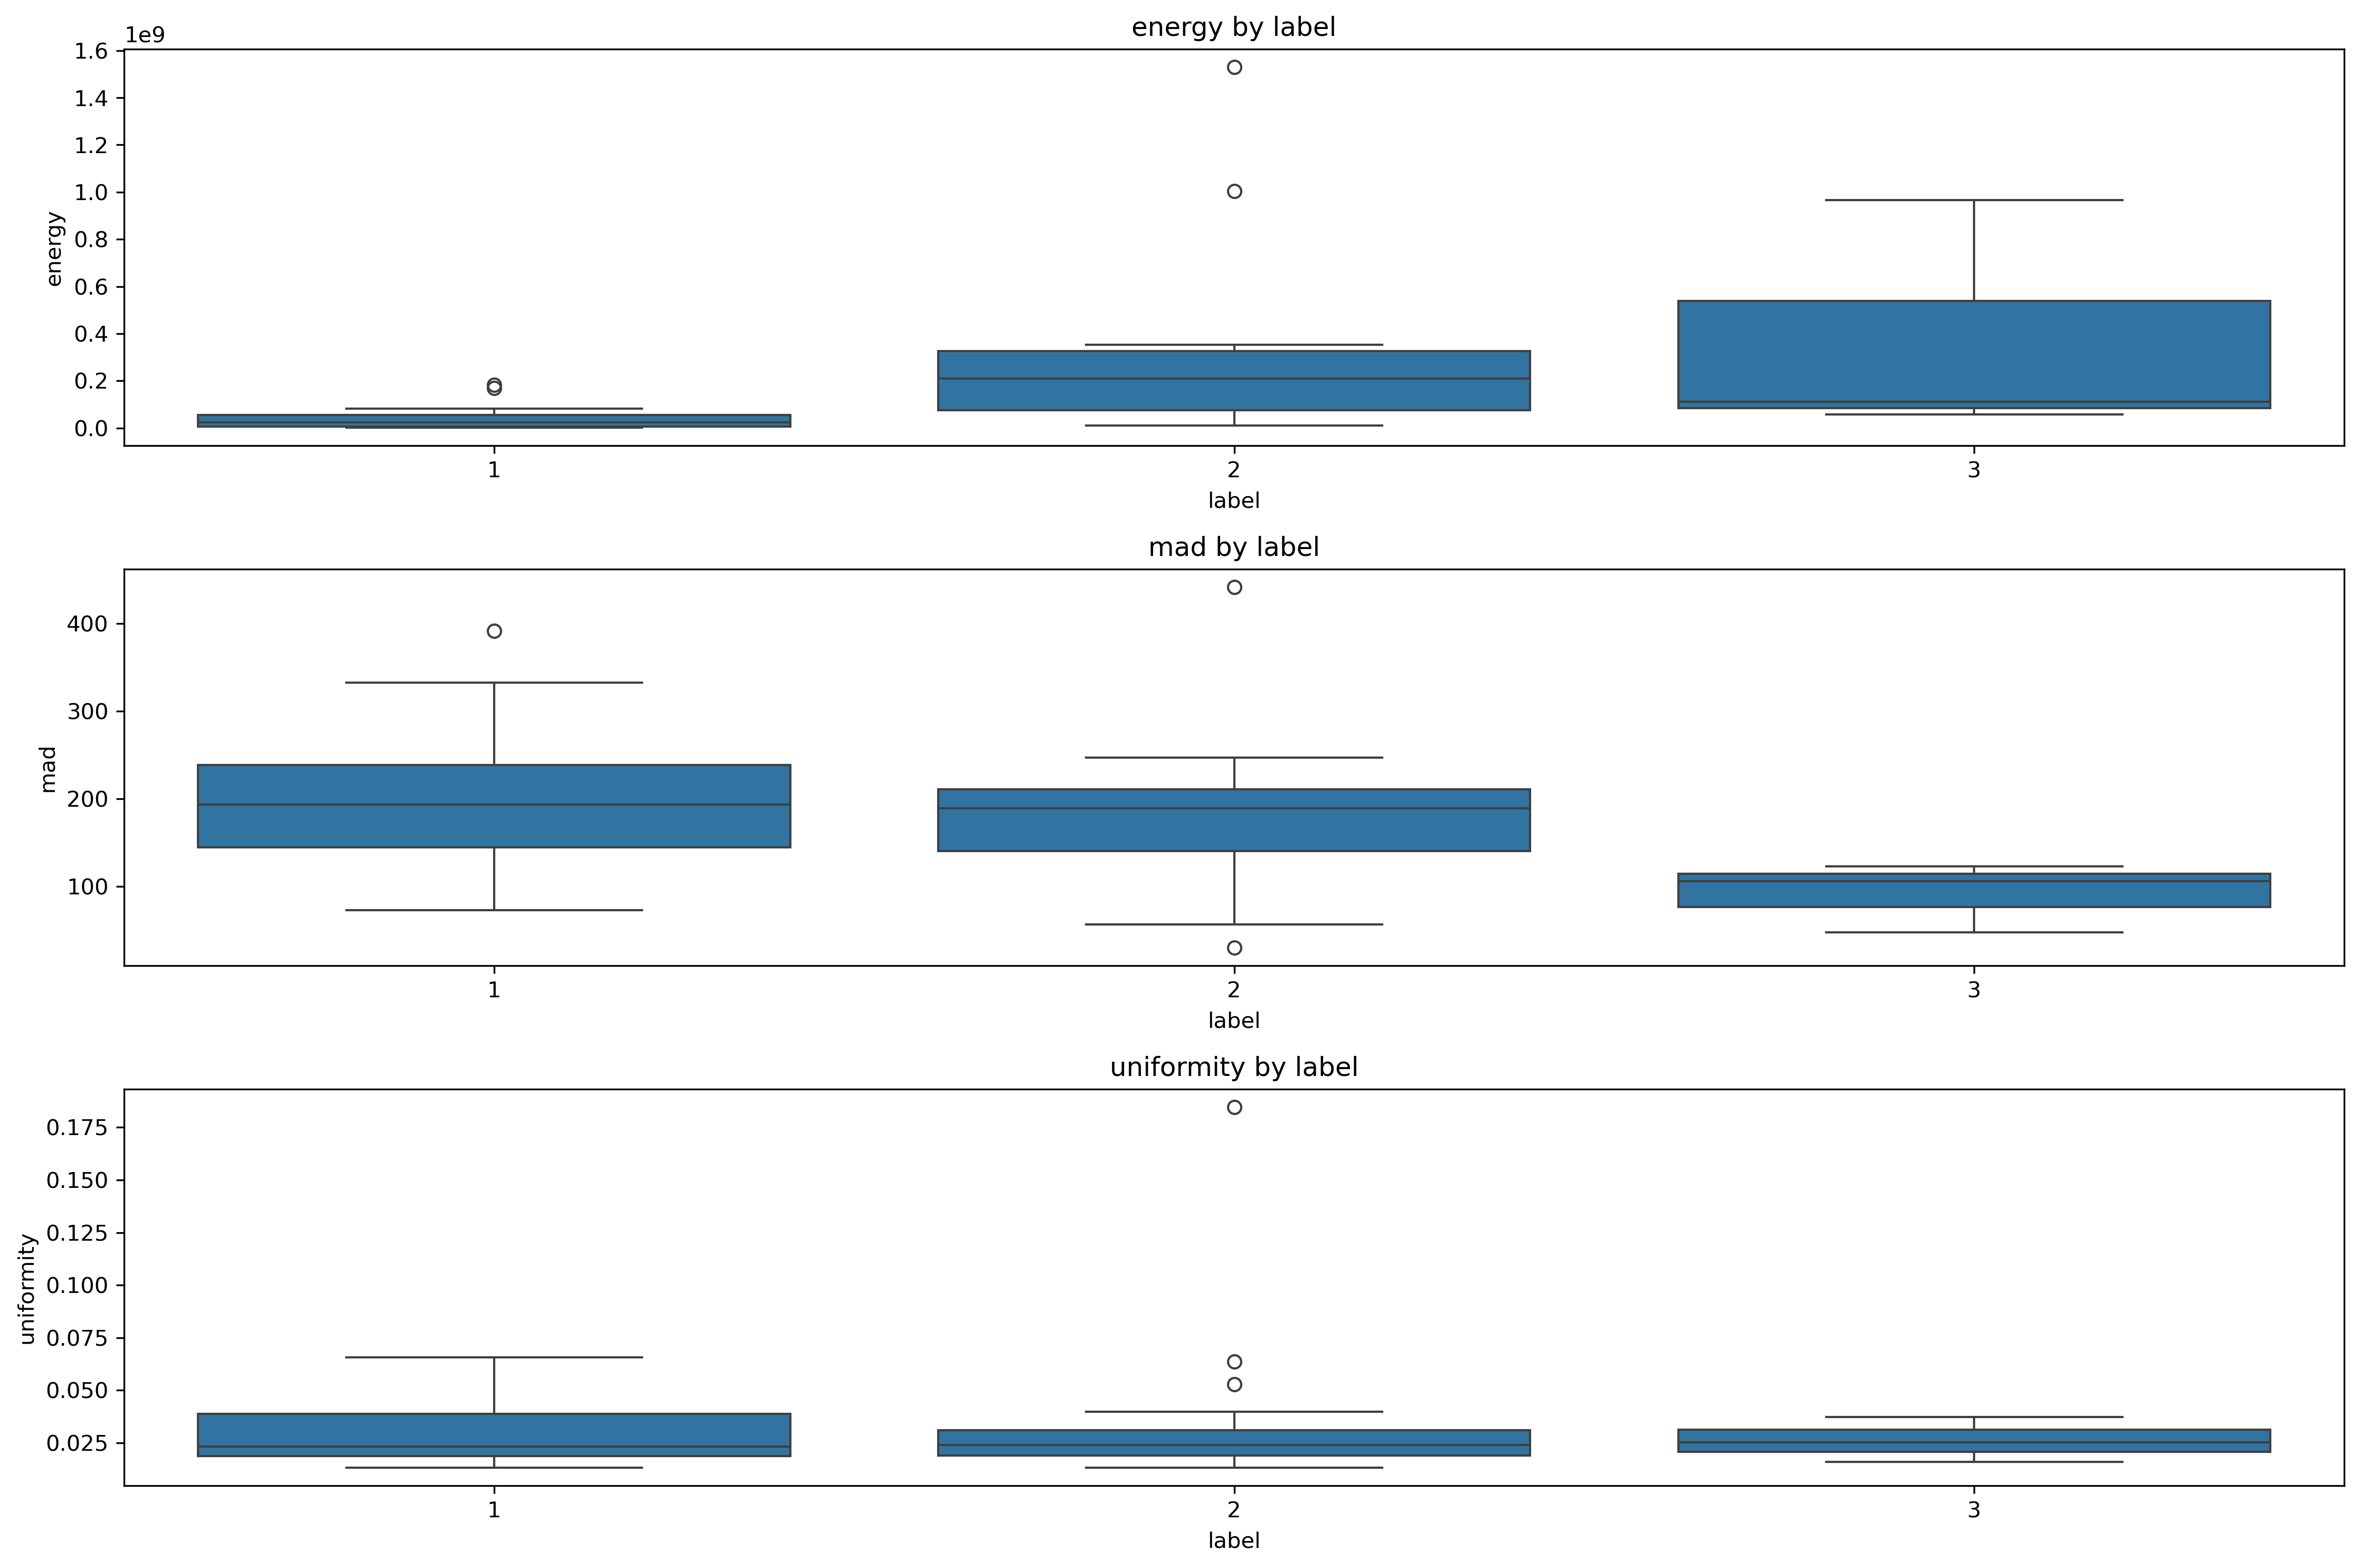

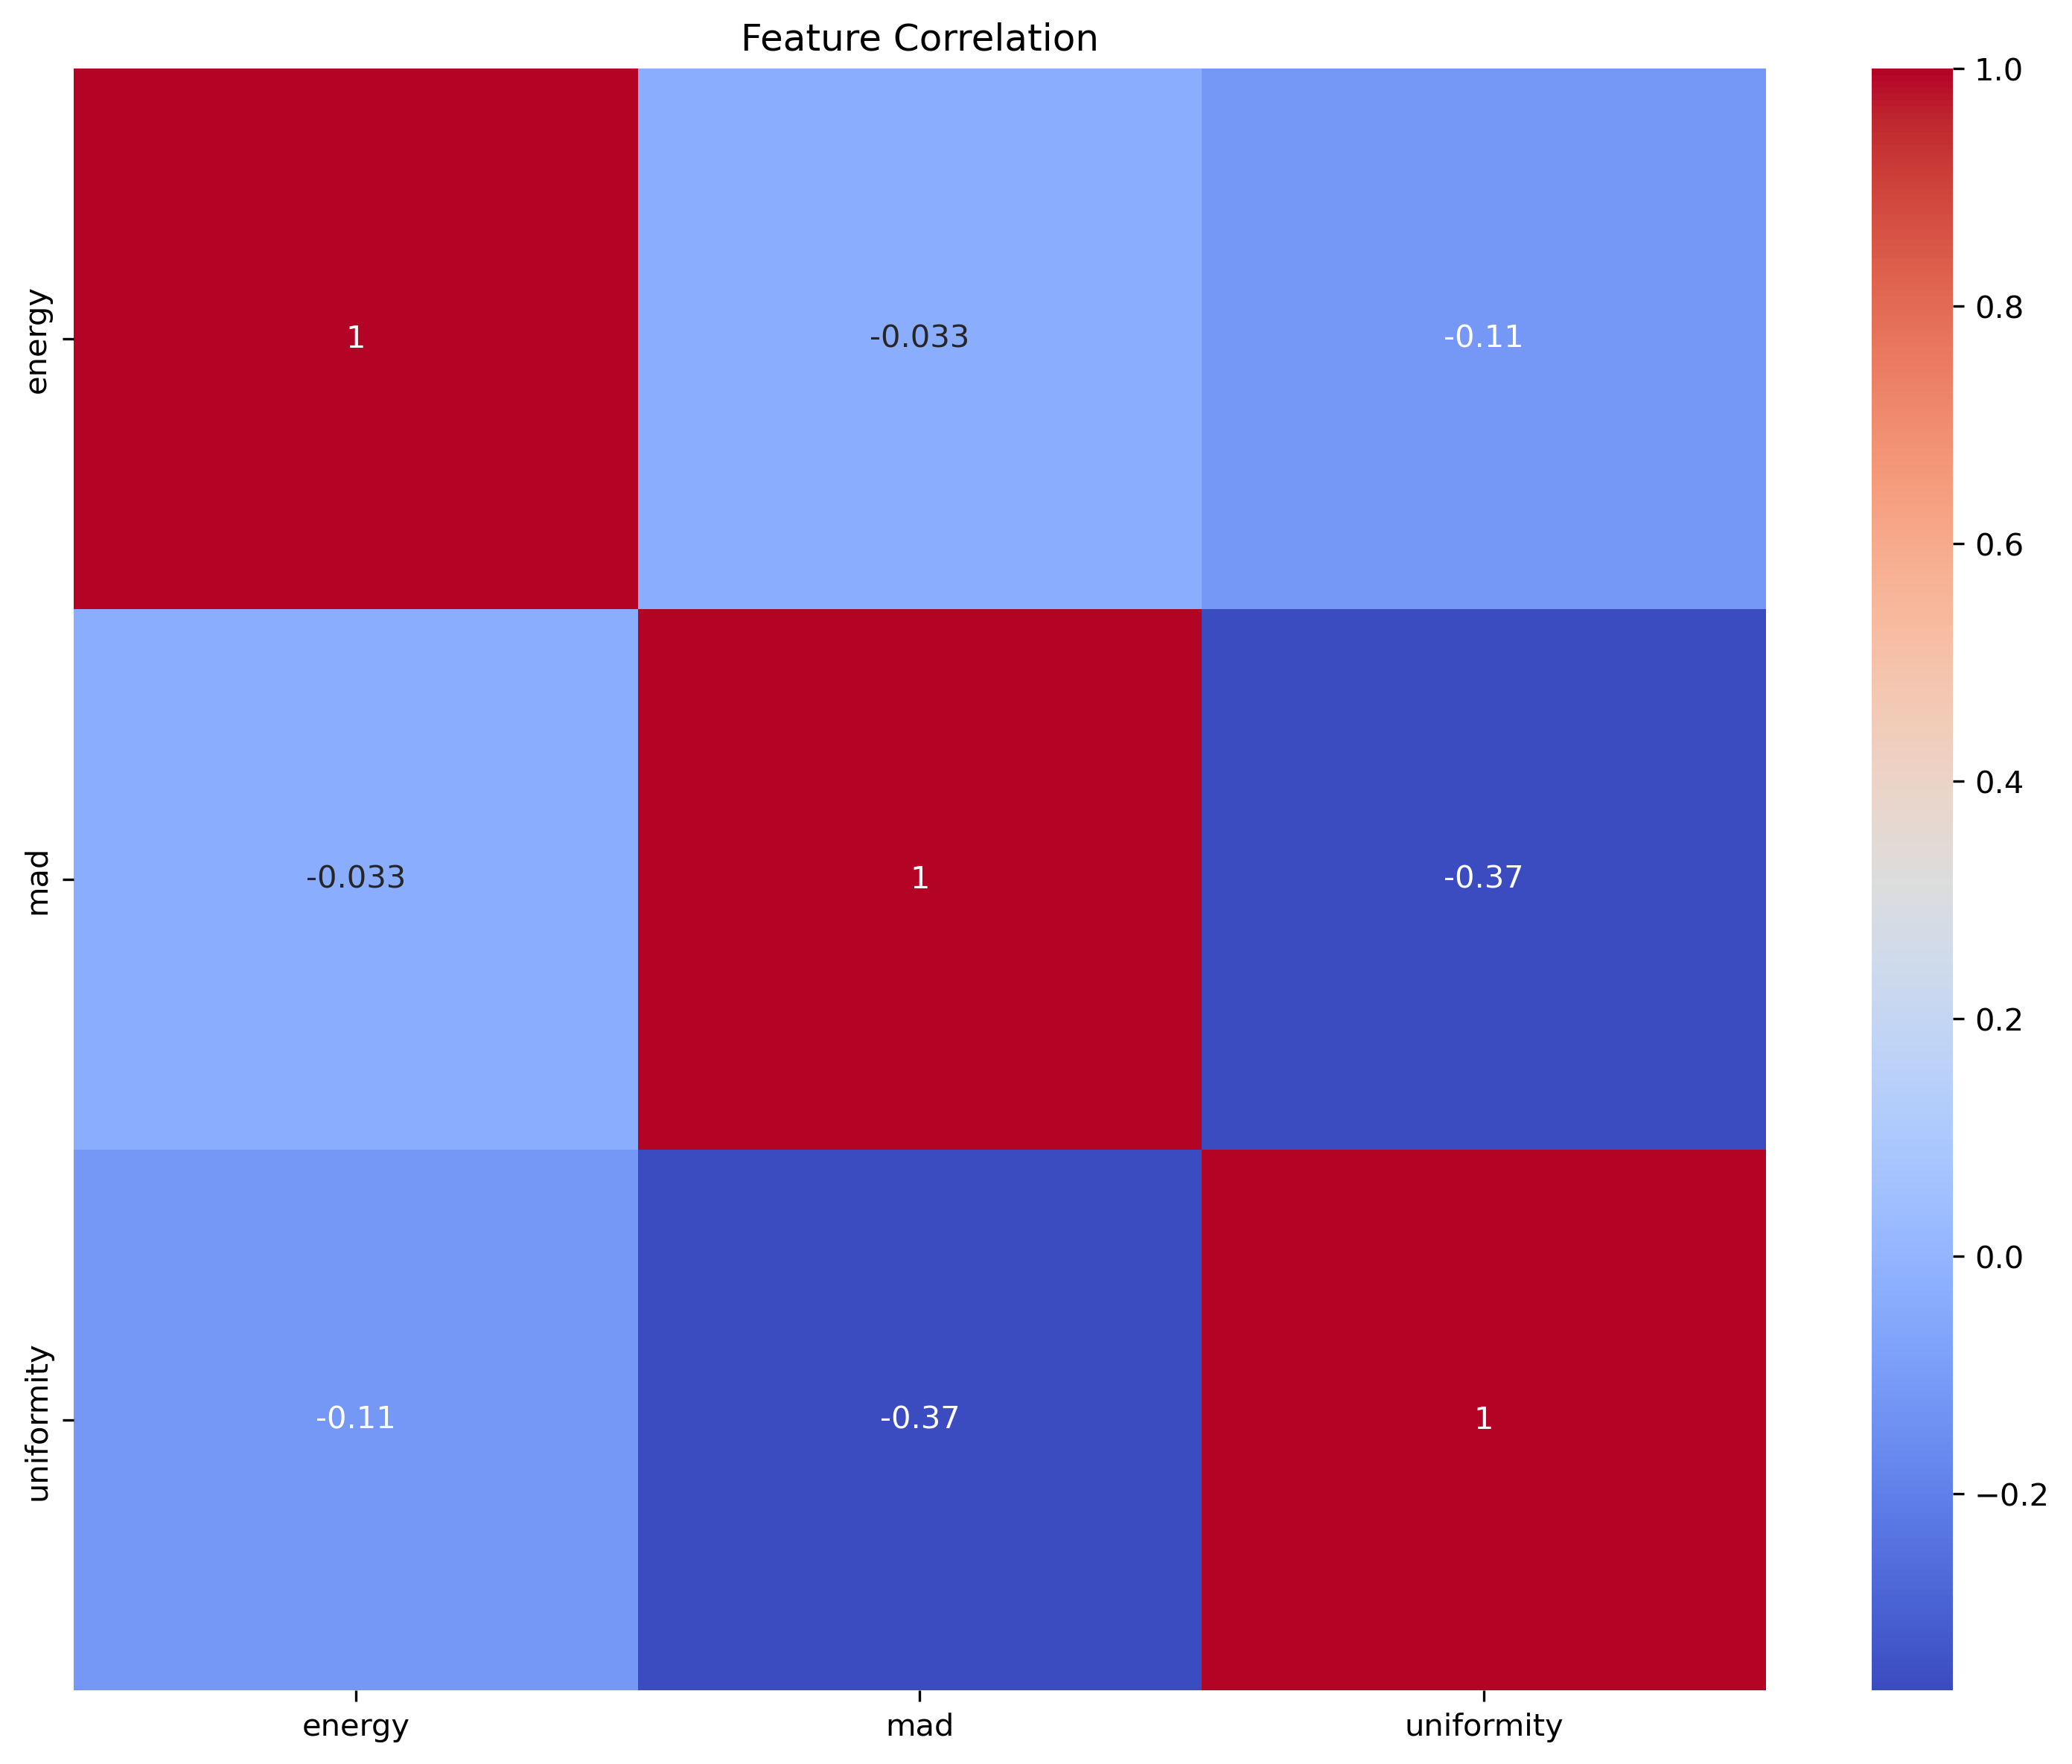

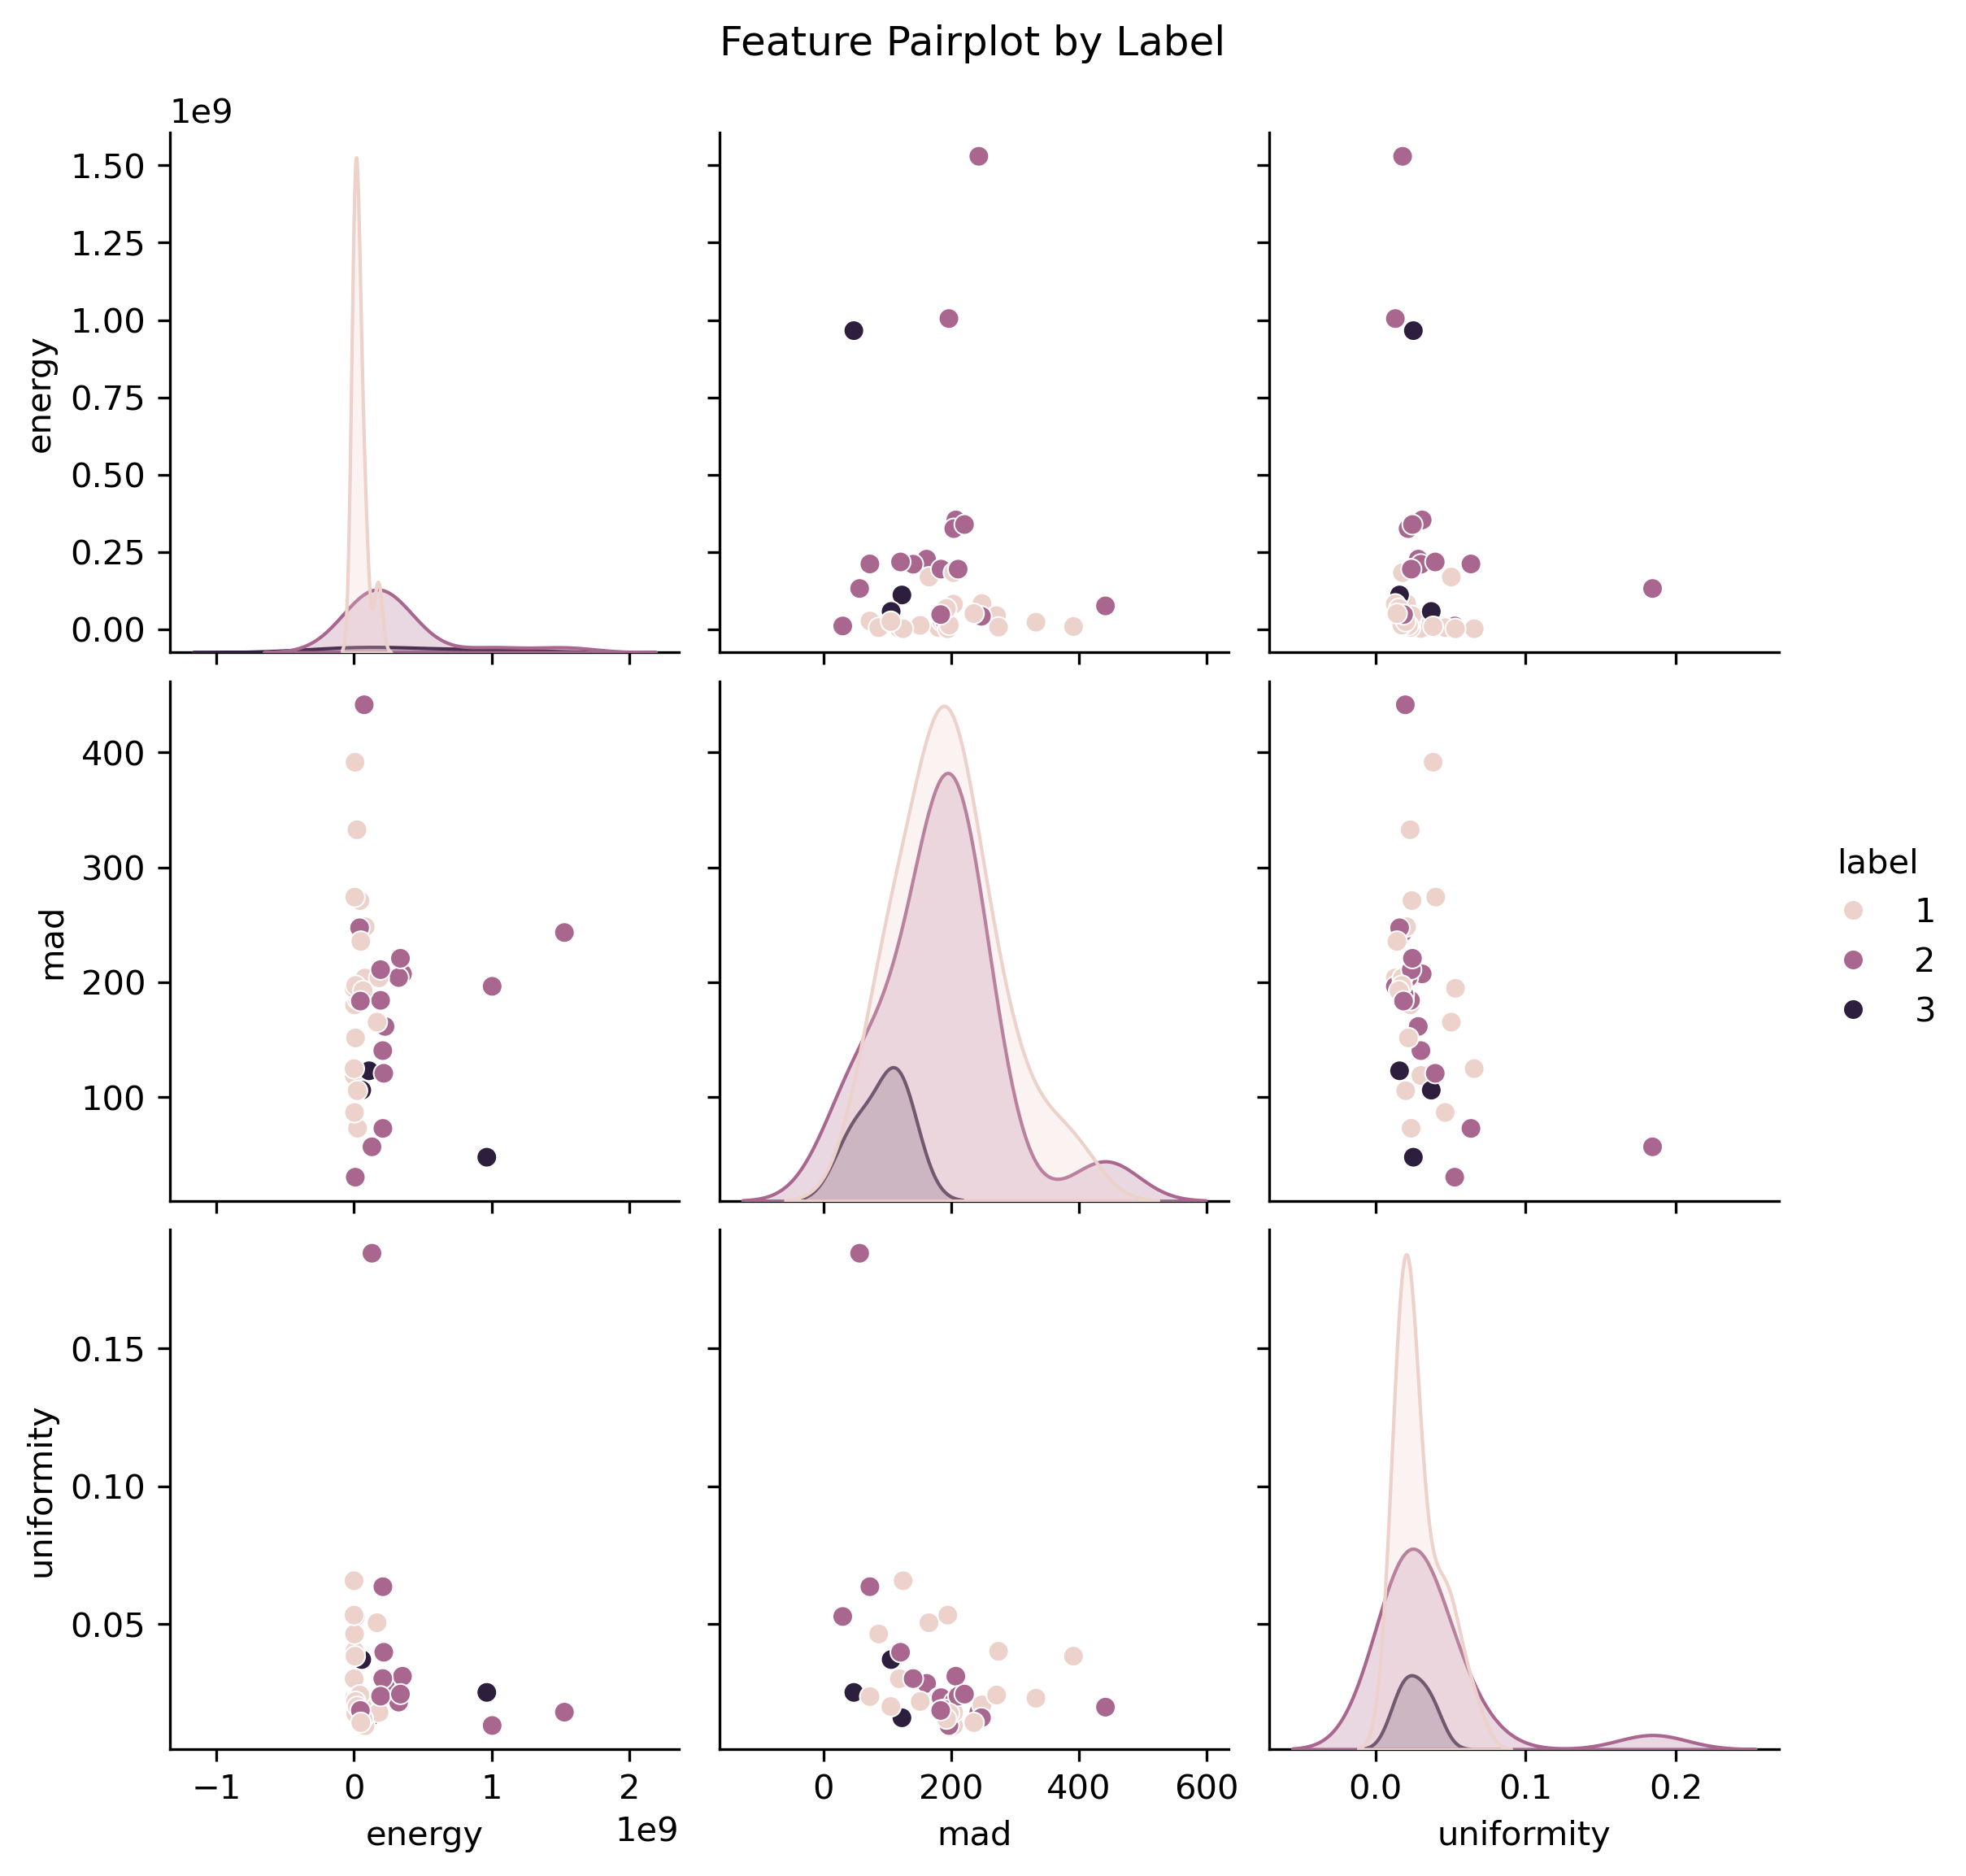

In [ ]:
import numpy as np
import pandas as pd

from a2cw import extract_fea, vis_fea

# find the ranges of min-max intensities
mins = []
maxs = []

for id in scans:
    voxels = scans[id][masks[id] > 0]
    if len(voxels) > 0:
        mins.append(np.min(voxels))
        maxs.append(np.max(voxels))

all_min = np.min(mins)
all_max = np.max(maxs)

print(f"Intensity range for all patients: [{all_min}, {all_max}]")


n_bins = 100
print(f"Using {n_bins} bins to calculate the uniformity.")

fea_dict = {}

for id in scans.keys():
    if id in labels.keys():
        features = extract_fea(scans[id], masks[id], n_bins=n_bins)
        
        if features:
            features['label'] = labels[id]
            fea_dict[id] = features
    else:
        print(f"Warning: Patient {id} has no label!")

# convey to DataFrame
fea_df = pd.DataFrame.from_dict(fea_dict, orient='index')

print(f"\nExtracted {len(fea_df)} patient features, print the first five rows:")
print(fea_df.head())

vis_fea(fea_df)


In [ ]:
from a2cw import analyse
import pandas as pd
pd.set_option('display.width', 150)
pd.set_option('display.max_columns', None) 

best_feature = analyse(fea_df).index[0]
print(f"\nBased on statistical significance, {best_feature} \
may be the best feature to classify between the benign and malignant lesions.")

t-test:
            t_statistic   p_value   mean_benign  mean_malignant    std_benign  std_malignant
energy        -3.052541  0.006369  4.174371e+07    3.137498e+08  5.127233e+07   3.850141e+08
mad            1.005067  0.321331  1.967732e+02    1.693786e+02  7.829315e+01   8.936224e+01
uniformity    -0.712795  0.482593  2.894423e-02    3.535466e-02  1.455553e-02   3.639880e-02

Based on statistical significance, energy may be the best feature to classify between the benign and malignant lesions.
